# Sydney House Prices 


**Objective:** My goal with this data analysis is to utilize the extensive Sydney House Prices dataset to identify and present the most viable and appealing house purchasing options specifically suited for the average middle-income individual, ensuring a focus on affordability and value. This analysis is conducted only for property type house.

In [130]:
#Importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data Exploration


In [131]:
#Exploring first 6 rows 
df = pd.read_csv('SydneyHousePrices.csv')
print(df.head())

         Date  Id        suburb  postalCode  sellPrice  bed  bath  car  \
0  2019-06-19   1  Avalon Beach        2107    1210000  4.0     2  2.0   
1  2019-06-13   2  Avalon Beach        2107    2250000  4.0     3  4.0   
2  2019-06-07   3   Whale Beach        2107    2920000  3.0     3  2.0   
3  2019-05-28   4  Avalon Beach        2107    1530000  3.0     1  2.0   
4  2019-05-22   5   Whale Beach        2107    8000000  5.0     4  4.0   

  propType  
0    house  
1    house  
2    house  
3    house  
4    house  


In [132]:
#Exploring last 6 rows 
print(df.tail())

              Date      Id         suburb  postalCode  sellPrice  bed  bath  \
199499  2014-06-20  199500       Illawong        2234    1900000  5.0     3   
199500  2014-05-26  199501       Illawong        2234     980000  4.0     3   
199501  2014-04-17  199502  Alfords Point        2234     850000  4.0     2   
199502  2013-09-07  199503       Illawong        2234     640000  3.0     2   
199503  2011-04-16  199504  Alfords Point        2234    1611000  5.0     4   

        car   propType  
199499  7.0      house  
199500  2.0      house  
199501  2.0      house  
199502  2.0  townhouse  
199503  3.0      house  


In [133]:
print(df.shape)

(199504, 9)


In [134]:
print(df.columns)

Index(['Date', 'Id', 'suburb', 'postalCode', 'sellPrice', 'bed', 'bath', 'car',
       'propType'],
      dtype='object')


In [135]:
print(df.dtypes)

Date           object
Id              int64
suburb         object
postalCode      int64
sellPrice       int64
bed           float64
bath            int64
car           float64
propType       object
dtype: object


In [136]:
print(df.describe())

                 Id     postalCode     sellPrice            bed  \
count  199504.00000  199504.000000  1.995040e+05  199350.000000   
mean    99752.50000    2196.379155  1.269776e+06       3.516479   
std     57591.98839     193.053467  6.948239e+06       1.066555   
min         1.00000    2000.000000  1.000000e+00       1.000000   
25%     49876.75000    2082.000000  7.200000e+05       3.000000   
50%     99752.50000    2144.000000  9.850000e+05       3.000000   
75%    149628.25000    2211.000000  1.475000e+06       4.000000   
max    199504.00000    4878.000000  2.147484e+09      99.000000   

                bath            car  
count  199504.000000  181353.000000  
mean        1.890669       1.936224  
std         0.926001       1.060237  
min         1.000000       1.000000  
25%         1.000000       1.000000  
50%         2.000000       2.000000  
75%         2.000000       2.000000  
max        99.000000      41.000000  


# Data Cleaning


Assuming that the missing entries in the 'bed' column indicate properties that are either newly constructed or where the owner may have removed their furniture, it is presumed that the purchaser would need to provide their own bedding solutions. Similarly, the absence of values in the 'car' column is assumed to denote properties that do not offer a parking facility, which could be a characteristic of certain types of properties within this dataset.

In [137]:
print(df.isnull().sum())

Date              0
Id                0
suburb            0
postalCode        0
sellPrice         0
bed             154
bath              0
car           18151
propType          0
dtype: int64


In [138]:
property_type_counts = df['propType'].value_counts()
print(property_type_counts)

propType
house                   170117
townhouse                15177
duplex/semi-detached      6722
villa                     5701
terrace                   1344
other                      392
warehouse                   40
acreage                     11
Name: count, dtype: int64


In [139]:
#Replacing missing 'bed' & 'car values with 0 assuming it means unfurnished
df['bed'] = df['bed'].fillna(0)

df['car'] = df['car'].fillna(0)


In [140]:
#Confirming changes
print(df.isnull().sum())

Date          0
Id            0
suburb        0
postalCode    0
sellPrice     0
bed           0
bath          0
car           0
propType      0
dtype: int64


## Analyzing Relationships

In [141]:
#reducing the primary dataset's property type to "house" 
houses = df[df['propType'] == 'house'] 

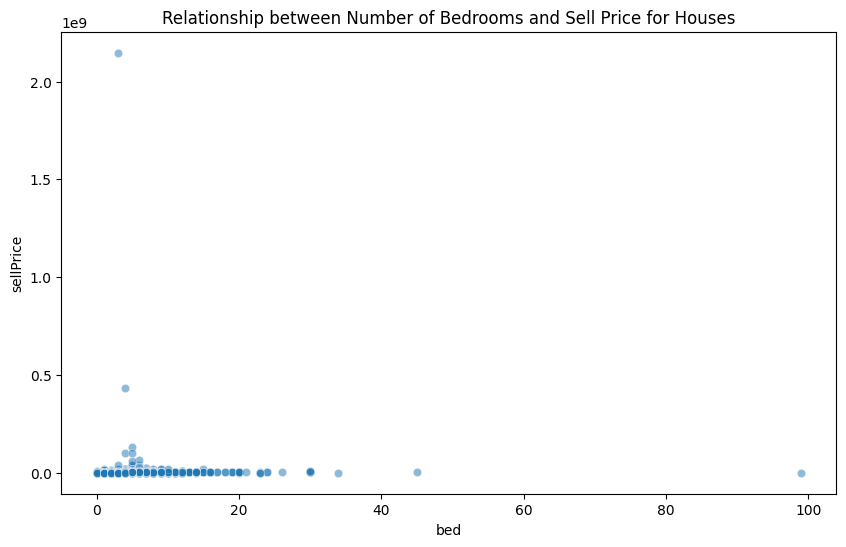

In [142]:
# Scatter Plot for 'sellPrice' and 'bed'
plt.figure(figsize =(10, 6))
sns.scatterplot(x = houses['bed'], y=houses['sellPrice'], alpha = 0.5)
plt.title("Relationship between Number of Bedrooms and Sell Price for Houses")
plt.show()

           sellPrice       bed       car
sellPrice   1.000000  0.054864  0.034890
bed         0.054864  1.000000  0.368906
car         0.034890  0.368906  1.000000


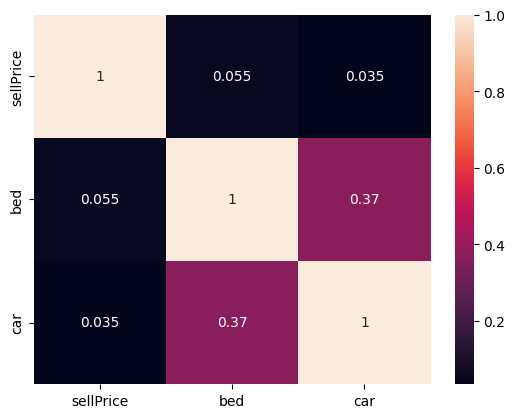

In [143]:
# Correlation Analysis
correlation_matrix = houses [['sellPrice', 'bed', 'car']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Hypothesis Testing

**H0**: There is no difference in the sell price of houses with more bedrooms compared to houses with fewer bedrooms.

**H1**: Houses with more bedrooms are more expensive than houses with fewer bedrooms. 

Data is **Normally distributed**

**p-value** = 0.44708493420769

**Conclusion**: There is no sufficient evidence provided to reject the null hypothesis, based on the sample data and this T-test, there is no significant difference in sell prices between the two groups of houses, and the number of bedrooms does not significantly impact the sell price. 


In [144]:
# Test for Equal Variance using Welch's T-test
houses_1_bed = houses[houses['bed'] == 1]['sellPrice']
houses_3_bed = houses[houses['bed'] == 3]['sellPrice']

# Welch's T-test
t_stat, p_val = stats.ttest_ind(houses_1_bed, houses_3_bed, equal_var= False)
print("Welch's T-test results - T-statistic:", t_stat, "P-value:", p_val)


Welch's T-test results - T-statistic: -4.347616953712149 P-value: 1.4089571906007537e-05


In [145]:
# Hypothesis Testing 
t_stat, p_val = stats.ttest_ind(
    houses[houses['bed'] == 1]['sellPrice'],
    houses[houses['bed'] == 3]['sellPrice']
)

print("T-Test between houses with 1 bed and houses with 3 beds:", p_val)

T-Test between houses with 1 bed and houses with 3 beds: 0.44708493420769


# Data Preprocessing

Assuming citizens working in CBD 

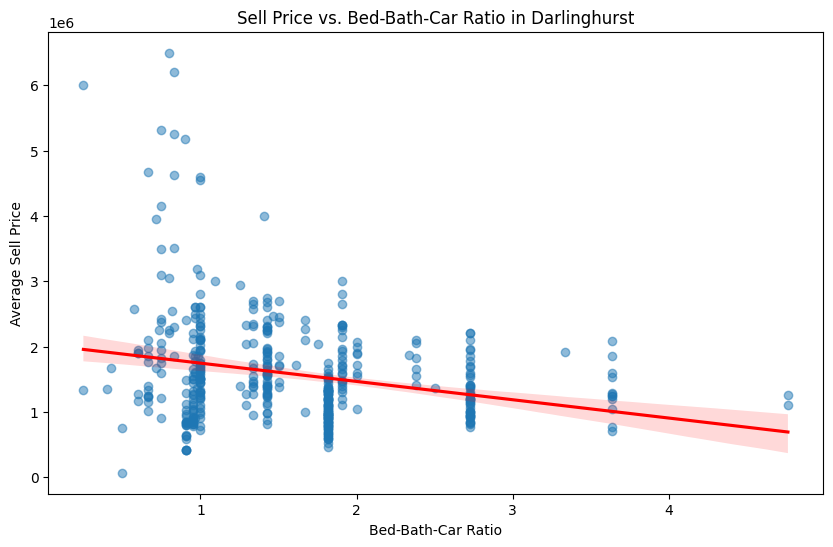

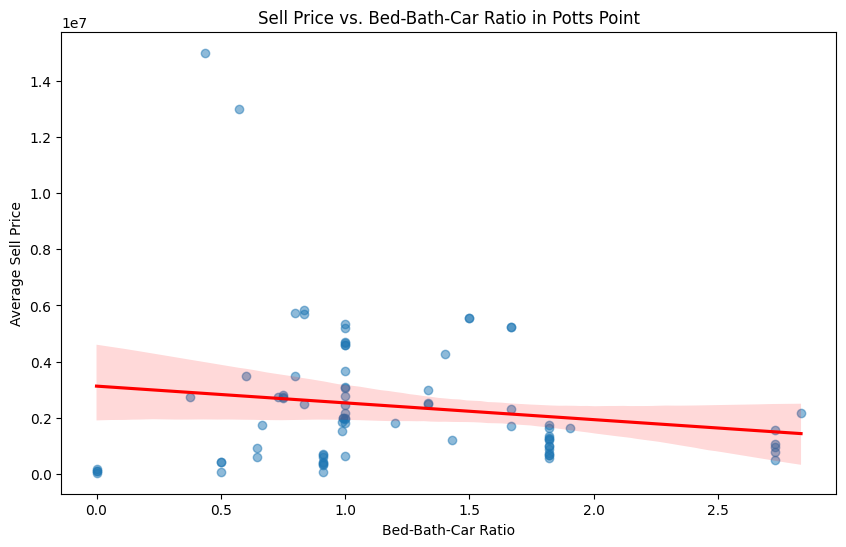

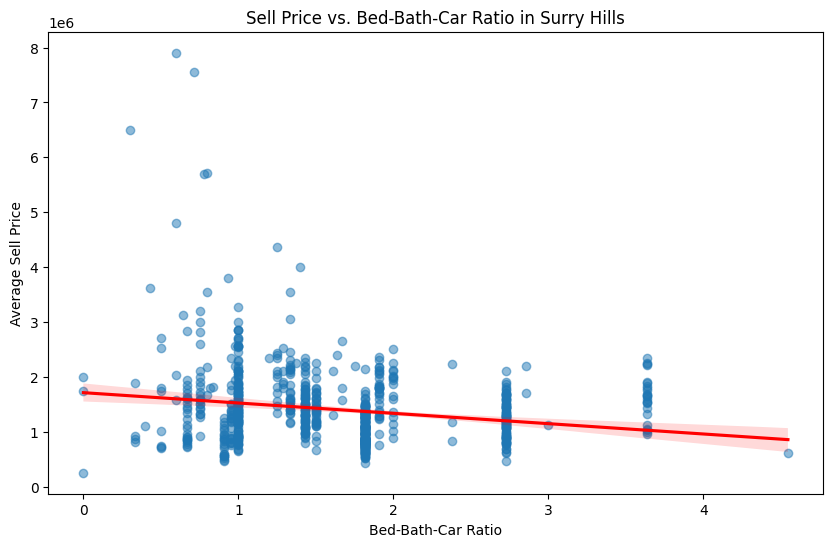

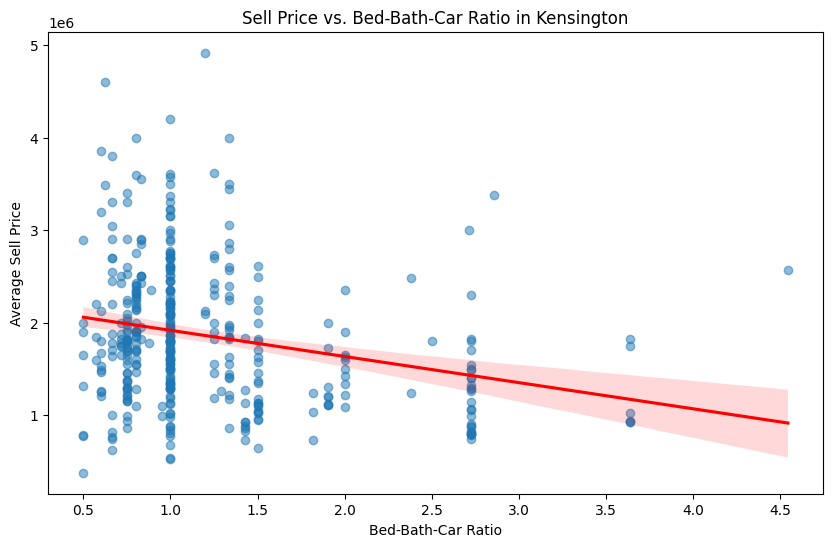

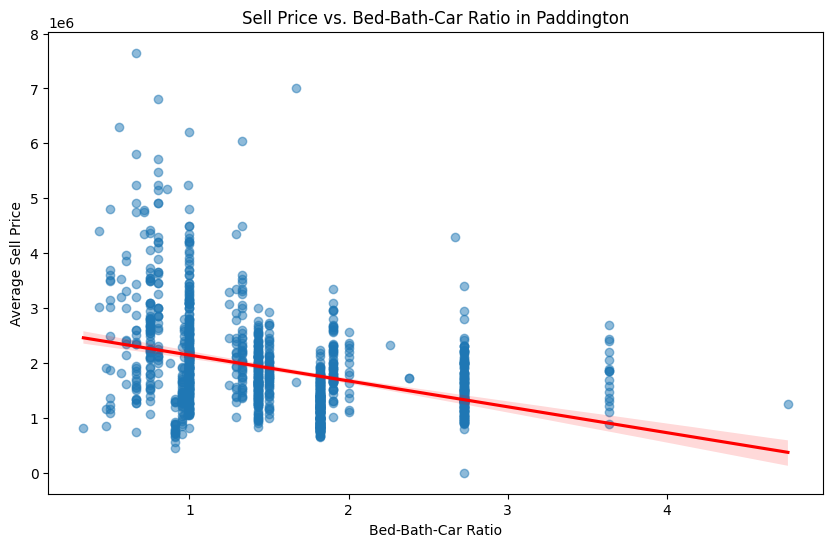

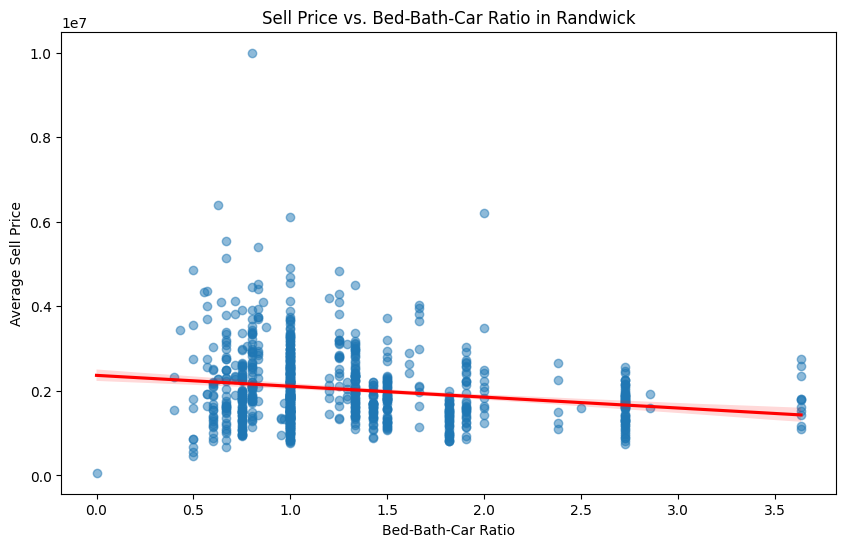

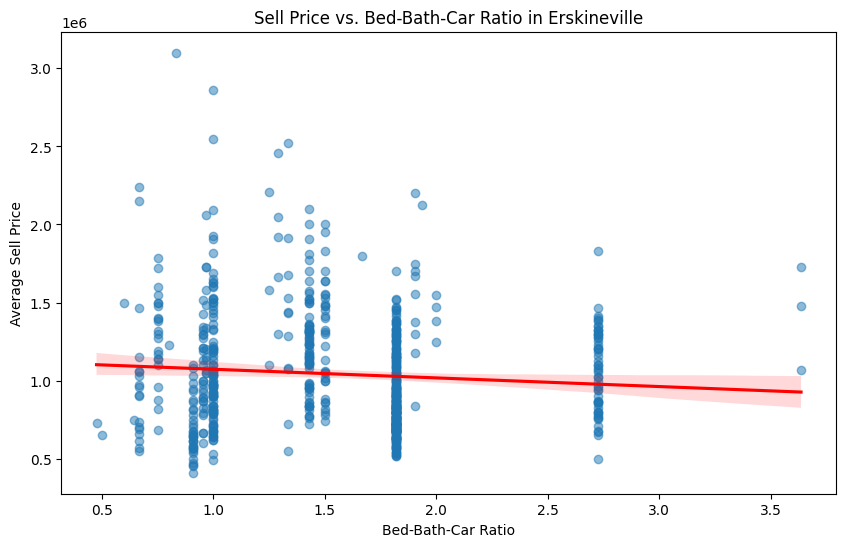

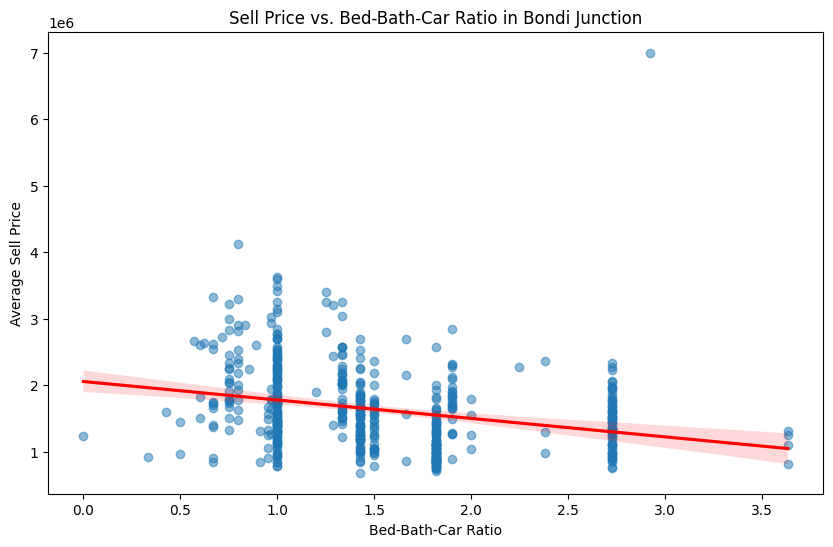

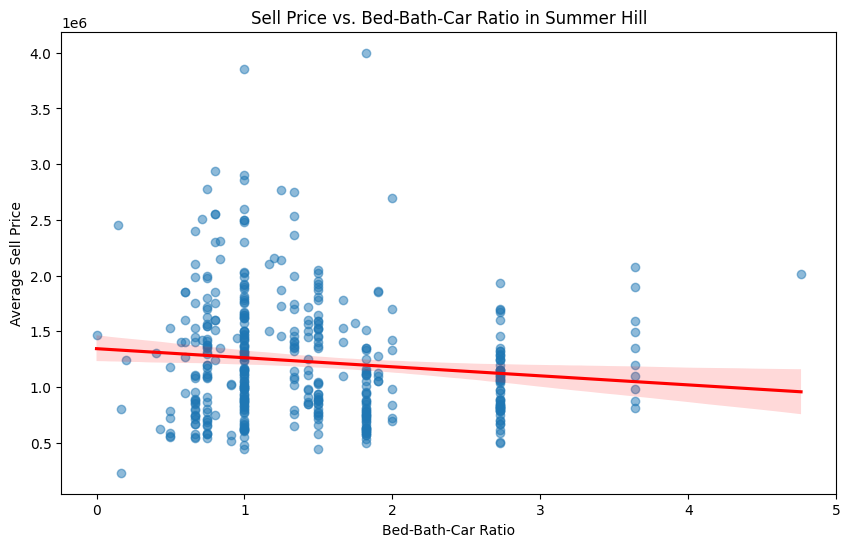

In [146]:
#Avoiding Division by Zero, replacing zeros in 'bath'and 'car' with a small number 
df['bath'] = df['bath'].replace(0, 0.1)
df['car'] = df['car'].replace(0, 0.1)

# Creating bed-bath-car ratio to estimate the landsize of the house
df['bed_bath_car_ratio'] = df['bed']/ (df['bath'] + df['car'])

# Analyzing sell price for different bed-bath-car ratios in each suburb closest to CBD
specific_suburbs = ['Darlinghurst', 'Potts Point', 'Surry Hills', 
                    'Kensington', 'Paddington', 'Randwick', 'Erskineville', 
                    'Bondi Junction', 'Summer Hill']

# Filtering the dataset for the specific suburbs
filtered_df = df[df['suburb'].isin(specific_suburbs)]

# Group by suburb and bed-bath-car ratio, then calculate average sell price
suburb_analysis = filtered_df.groupby(['suburb', 'bed_bath_car_ratio']).agg({'sellPrice': 'mean'}).reset_index()

for suburb in specific_suburbs:
    subset = suburb_analysis[suburb_analysis['suburb'] == suburb]
    plt.figure(figsize=(10,6))
    sns.regplot(x='bed_bath_car_ratio', y='sellPrice', data=df[df['suburb'] == suburb], 
                scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Sell Price vs. Bed-Bath-Car Ratio in {suburb}')
    plt.xlabel('Bed-Bath-Car Ratio')
    plt.ylabel('Average Sell Price')
    plt.show()

# Filtering

Classifying Properties Based On Affordibility and Value.

According to an Australia Institute estimate, the average income of a middle-class Sydney employee working full-time in 2024 would be approximately $83,000. For part-time employees, the average income will be closer to $40,000. Please visit this link for additional information: https://australiainstitute.org.au/post/where-is-the-middle-income-in-Australia/

Considering Affordibility:
- Based on Price: $400K - $2million
- Location: Suburbs Near CBD
- Size: having bed-bath-car ratio of range 1-1.5




In [147]:
# defining Suitabable Column based on sellPrice, Location and Bed_Bath_Car_Ratio 
df['suitable'] = ((df['sellPrice'] >= 1000000) &
                  (df['sellPrice'] <= 5000000)&
                  (df['suburb'].isin(specific_suburbs))&
                  (df['bed_bath_car_ratio']>=1)&
                  (df['bed_bath_car_ratio']<= 1.5)).astype(int)



In [148]:
# Counting the number of suitable houses in each suburb
suitbale_houses = df[df['suitable'] == 1].groupby('suburb').size()

#Converting the Series to Dictionary

suitbale_houses_dict = suitbale_houses.to_dict()

print(suitbale_houses_dict)



{'Bondi Junction': 236, 'Darlinghurst': 126, 'Erskineville': 141, 'Kensington': 177, 'Paddington': 475, 'Potts Point': 19, 'Randwick': 431, 'Summer Hill': 125, 'Surry Hills': 234}


In [149]:
from sklearn.model_selection import train_test_split
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['days'] = df['Date'].dt.day
df = df.drop('propType', axis= 1)
df = df.drop('Date', axis=1)
X = df.drop(['suitable', 'suburb', 'sellPrice', 'bed_bath_car_ratio'], axis =1 )
y = df['suitable']

#Splitting dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Initialize the Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)

# Train the model
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9958397032655824
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39529
           1       0.82      0.70      0.76       372

    accuracy                           1.00     39901
   macro avg       0.91      0.85      0.88     39901
weighted avg       1.00      1.00      1.00     39901



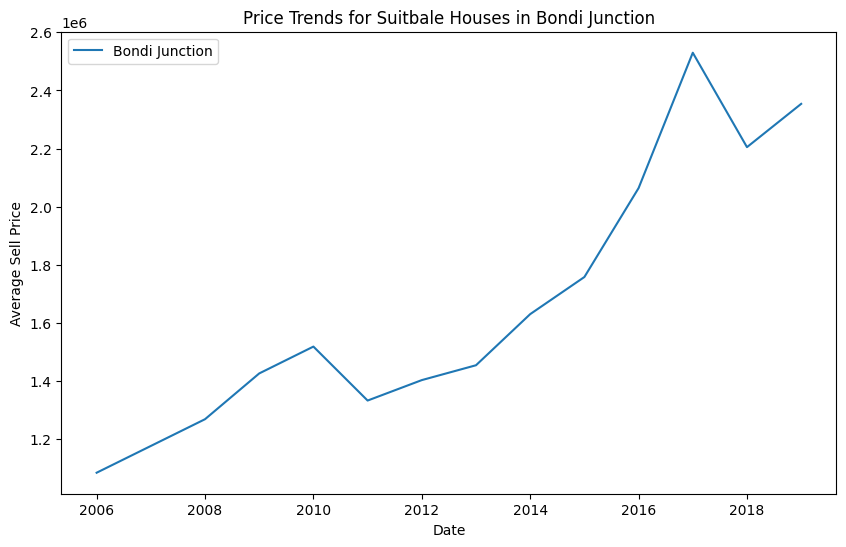

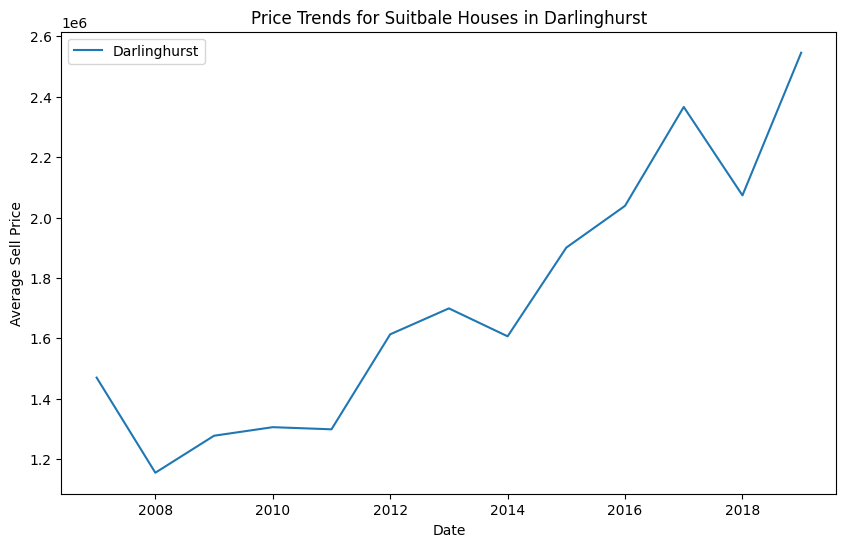

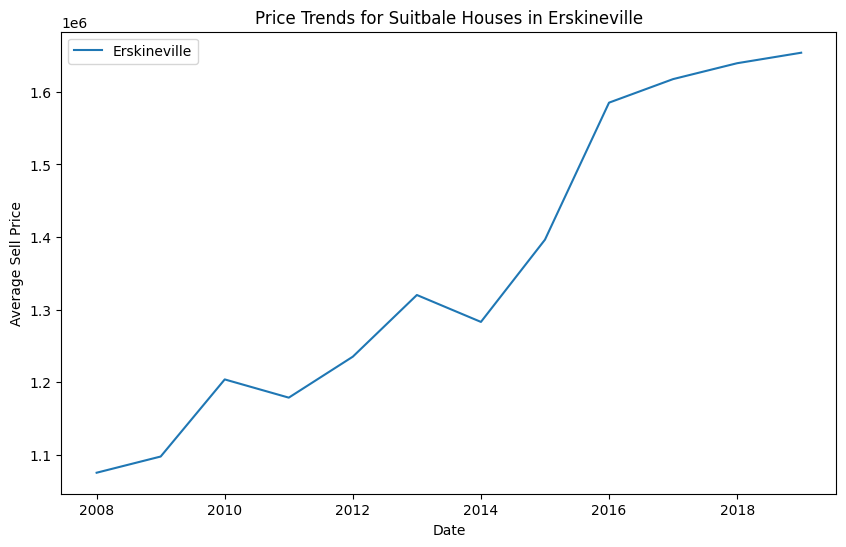

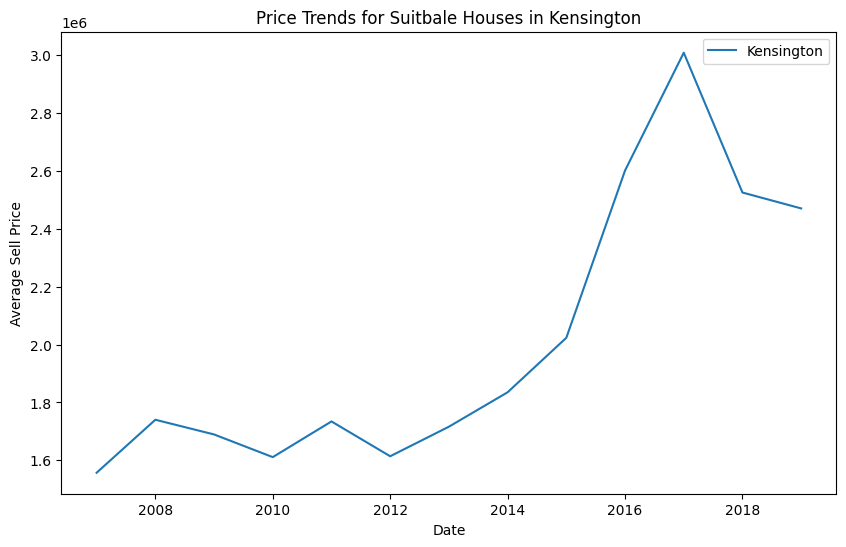

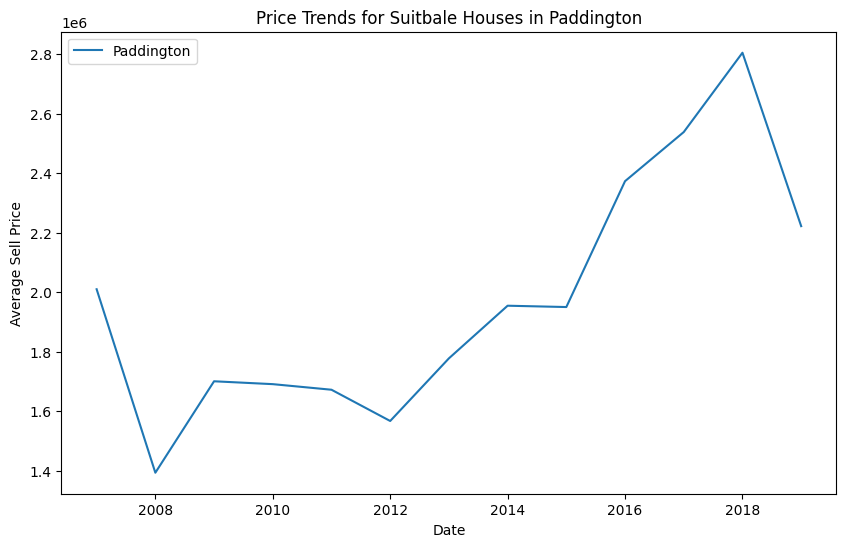

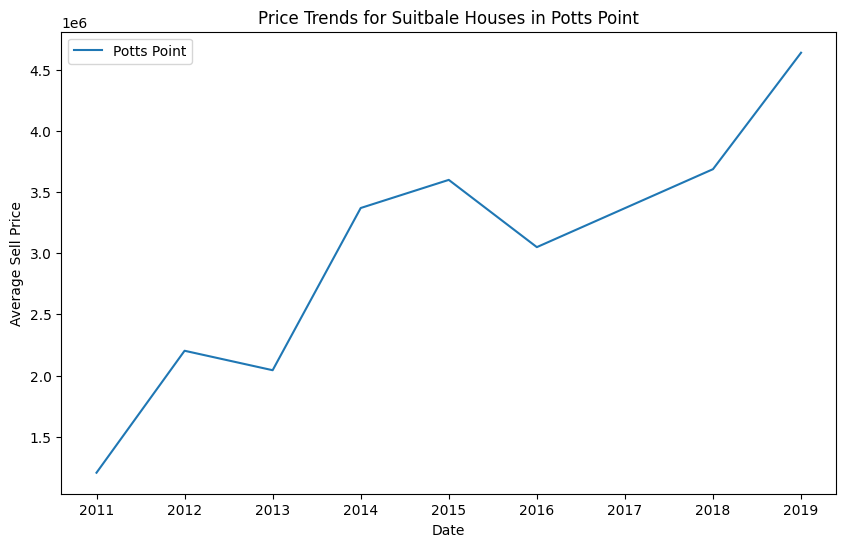

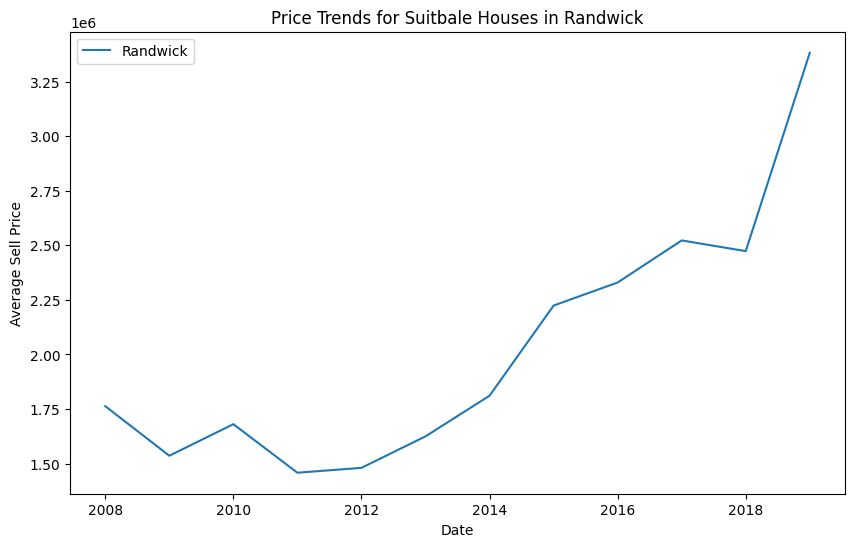

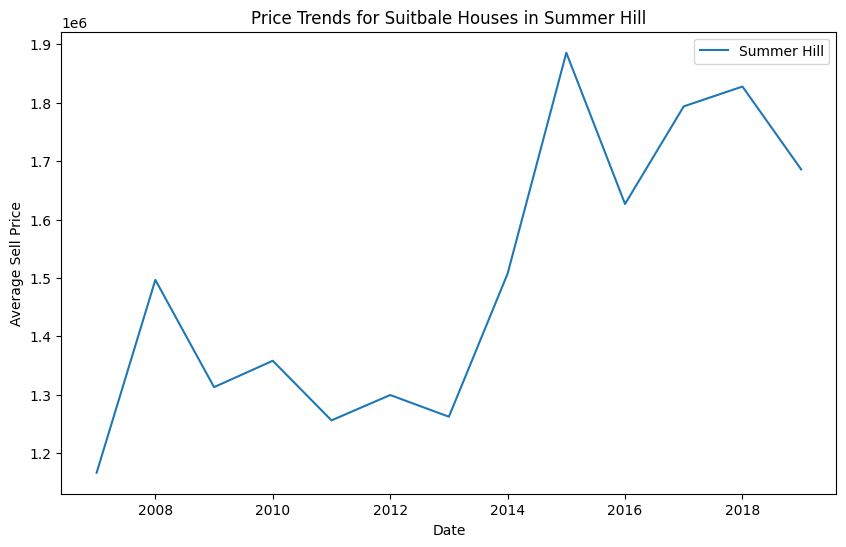

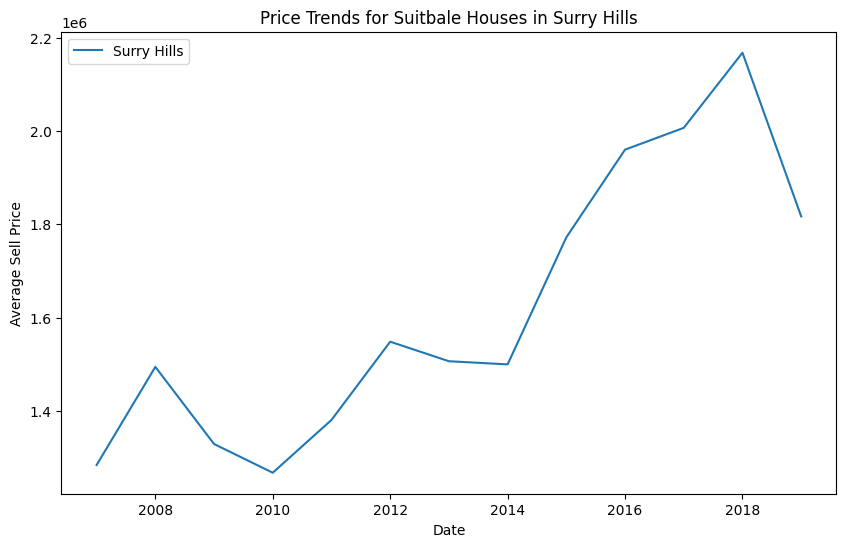

In [151]:
# Trends
trends = df[df['suitable'] == 1].groupby(['suburb','year']).mean()['sellPrice'].reset_index()
for area in trends['suburb'].unique():
    area_trends = trends[trends['suburb'] == area]
    plt.figure(figsize=(10,6))
    plt.plot(area_trends['year'], area_trends['sellPrice'], label = area)
    plt.title(f"Price Trends for Suitbale Houses in {area}")
    plt.xlabel("Date")
    plt.ylabel("Average Sell Price")
    plt.legend()
    plt.show()


## Machine Learning MODEL 

### Inspecting Data 

In [152]:
# Exploring the sellPrice Columns 
print(df['sellPrice'].describe())

count    1.995040e+05
mean     1.269776e+06
std      6.948239e+06
min      1.000000e+00
25%      7.200000e+05
50%      9.850000e+05
75%      1.475000e+06
max      2.147484e+09
Name: sellPrice, dtype: float64


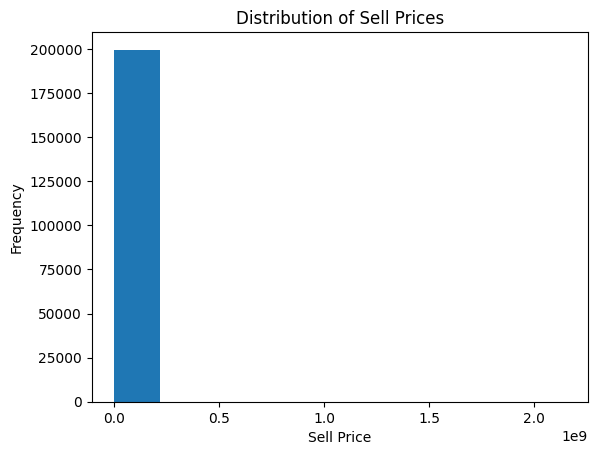

In [153]:
# Visualizing the distribution of the sellPrice 
plt.hist(df['sellPrice'])
plt.xlabel('Sell Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sell Prices')
plt.show()

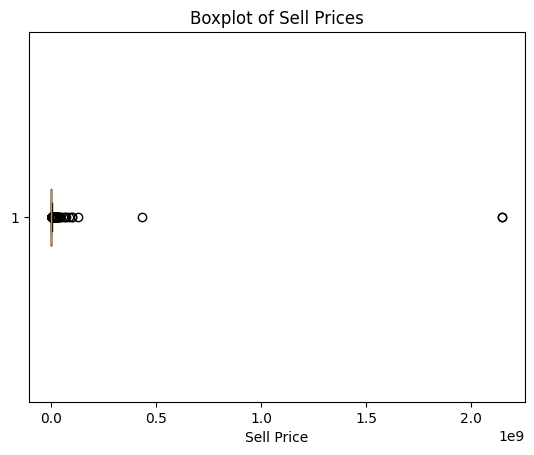

In [154]:
#Identifying Oultliers in sellPrice column 
plt.boxplot(df['sellPrice'], vert= False)
plt.title('Boxplot of Sell Prices')
plt.xlabel('Sell Price')
plt.show()


In [155]:
# Filtering Properties Having more Price worth more than a billion dollars 
df = df[df['sellPrice']< 1.e+9]

In [166]:
# Area Trends
median_price_area = df.groupby(['suburb','year'])['sellPrice'].median().reset_index(name = "MedianAreaPrice")
df = df.merge(median_price_area, on = ['suburb','year'])

In [174]:
#Converting the all the Suburbs into numerical forms

df_main_encoded = df
#Removing the specific suburbs from the dataset for our training data 
suburbs_to_remove = ['Darlinghurst', 'Potts Point', 'Surry Hills', 
                    'Kensington', 'Paddington', 'Randwick', 'Erskineville', 
                    'Bondi Junction', 'Summer Hill']

df_main_encoded = df_main_encoded[~df_main_encoded['suburb'].isin(suburbs_to_remove)]

    

df_main_encoded = pd.get_dummies(df, columns=['suburb'])
df_main_encoded = df_main_encoded.astype(int)
df_main_encoded.head()
#Dropping bed_bath_car_ratio 
df_main_encoded= df_main_encoded.drop('bed_bath_car_ratio',axis= 1)





In [181]:
# Giving a new Variable name to our dataset 
df_train = df_main_encoded

### Converting Suburbs into numerical Form

In [ ]:
#Initializing the OneHotEncoder
encoder = OneHotEncoder()
suburb_encoded = encoder.fit_transform(trends[['suburb']]).toarray()



In [ ]:
#Rechecking list feature_names to check whether all the suitable suburbs are in the list.
feature_names = encoder.get_feature_names_out(['suburb'])
print(feature_names)

['suburb_Bondi Junction' 'suburb_Darlinghurst' 'suburb_Erskineville'
 'suburb_Kensington' 'suburb_Paddington' 'suburb_Potts Point'
 'suburb_Randwick' 'suburb_Summer Hill' 'suburb_Surry Hills']


In [ ]:
#Checking the the shape of the encoded dataFrame 
suburb_encoded_df = pd.DataFrame(suburb_encoded, columns= feature_names)

In [180]:
df.reset_index(drop=True, inplace=True)
suburb_encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df.drop(['suburb','bed_bath_car_ratio'], axis=1), suburb_encoded_df], axis=1)
# Checking the first few rows of the new DataFrame
df_encoded.head()


,Id,postalCode,sellPrice,bed,bath,car,suitable,year,month,days,...,MedianAreaPrice,suburb_Bondi Junction,suburb_Darlinghurst,suburb_Erskineville,suburb_Kensington,suburb_Paddington,suburb_Potts Point,suburb_Randwick,suburb_Summer Hill,suburb_Surry Hills
0,1,2107,1210000,4.0,2,2.0,0,2019,6,19,...,1775000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2107,2250000,4.0,3,4.0,0,2019,6,13,...,1775000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2107,1530000,3.0,1,2.0,0,2019,5,28,...,1775000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,2107,1510000,3.0,1,2.0,0,2019,4,13,...,1775000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,2107,1500000,5.0,4,4.0,0,2019,4,11,...,1775000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Defining the Independent and Dependent variable for Training dataset
X_train = df_train.drop('sellPrice', axis= 1)
y_train = df_train['sellPrice']

#Defining the Independent and Dependent variable for Testing dataset
X_test = df_encoded.drop('sellPrice', axis=1)
y_test = df_encoded['sellPrice']

In [182]:
#Initializing the model 
model = RandomForestRegressor(random_state=42)

# Training the model on the training dataset 
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [183]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.002510616275281321
Root Mean Squared Error: 0.05010605028618122
Mean Absolute Error: 0.004941480163404426


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
